In [3]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('D:/Git/TITANIC/train.csv')

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [7]:
train.info()
train.columns
train.describe()
train.tail()
train["Sex"].value_counts()
train["Pclass"].value_counts()
train["Survived"].value_counts()
train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

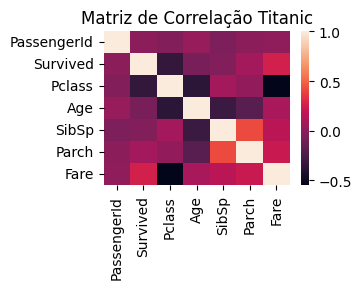

In [8]:
# Estuda da correlação linear entre variáveis
numericas = train.select_dtypes(include = ["int64","float64"])
matrizCorrelacao = numericas.corr()
plt.figure(figsize = (3,2))
sns.heatmap(matrizCorrelacao)
plt.title("Matriz de Correlação Titanic")
plt.show()

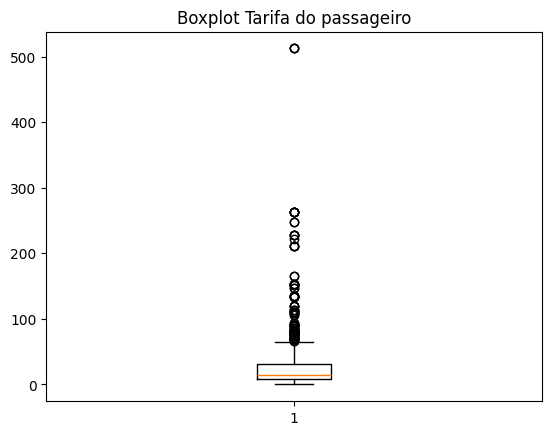

In [9]:
plt.boxplot(train["Fare"])
plt.title("Boxplot Tarifa do passageiro")
plt.show()

array([[<Axes: xlabel='PassengerId', ylabel='PassengerId'>,
        <Axes: xlabel='Survived', ylabel='PassengerId'>,
        <Axes: xlabel='Pclass', ylabel='PassengerId'>,
        <Axes: xlabel='Age', ylabel='PassengerId'>,
        <Axes: xlabel='SibSp', ylabel='PassengerId'>,
        <Axes: xlabel='Parch', ylabel='PassengerId'>,
        <Axes: xlabel='Fare', ylabel='PassengerId'>],
       [<Axes: xlabel='PassengerId', ylabel='Survived'>,
        <Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>],
       [<Axes: xlabel='PassengerId', ylabel='Pclass'>,
        <Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass

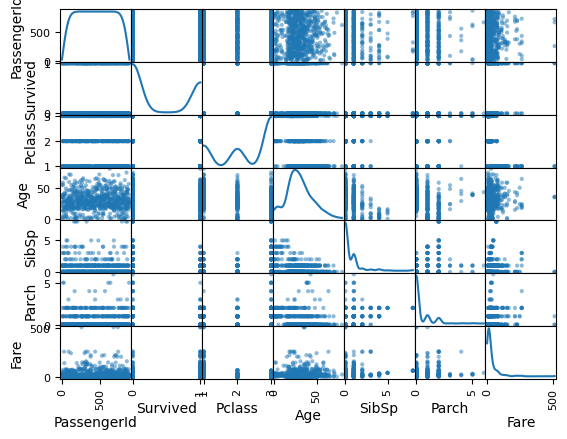

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(numericas, diagonal = "kde")

In [39]:
df_PCA = train[["Age","Fare"]]

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(df_PCA)

In [41]:
scaled_data = scaler.transform(df_PCA)

In [42]:
scaled_data

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [44]:
scaled_data.shape

(891, 2)

In [45]:
pca.fit(scaled_data)

PCA(n_components=2)

In [46]:
X_pca = pca.transform(scaled_data)

In [48]:
X_pca.shape

(891, 2)

In [54]:
pca.explained_variance_ratio_

array([0.54578305, 0.45421695])

In [62]:
X_pca = pd.DataFrame(X_pca)

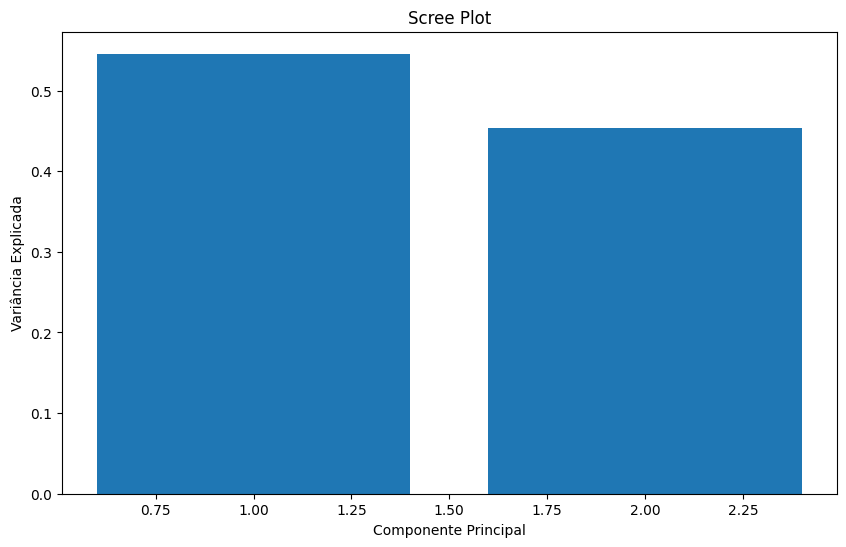

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Scree Plot')
plt.show()

In [69]:
X_pca = X_pca.rename(columns={0: "PCA 1", 1: "PCA 2"})

In [75]:
X_pca.head()

,PCA 1,PCA 2,PassengerId
0,-0.774229,0.063665,1
1,1.008076,0.104692,2
2,-0.546959,-0.144385,3
3,0.585948,0.009054,4
4,-0.055445,-0.632340,5


In [77]:
merged_df = X_pca.merge(train, on="PassengerId", how="left")

In [78]:
merged_df.head()

,PCA 1,PCA 2,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-0.774229,0.063665,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.008076,0.104692,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,-0.546959,-0.144385,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,0.585948,0.009054,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,-0.055445,-0.632340,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


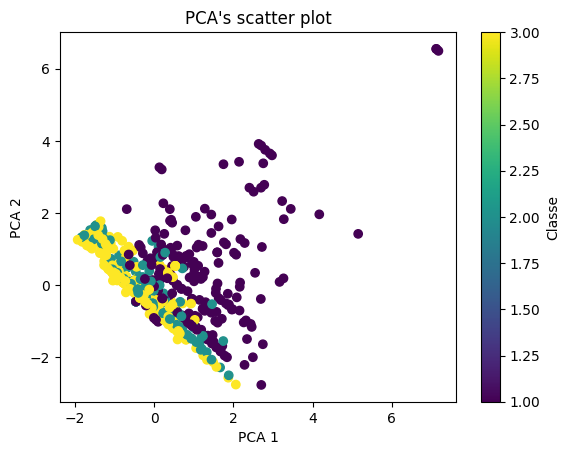

In [83]:
plt.scatter(merged_df['PCA 1'],merged_df["PCA 2"],c = merged_df['Pclass'])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA's scatter plot")
plt.colorbar(label = "Classe")